# MD004 ENTREGA7 ENTROPÍA


Se dispone del siguiente dataset que contiene características de dos tipos de calabazas. El objetivo será elaborar un modelo de regresión logística que nos permita realizar una predicción sobre si la calabaza es del tipo Urgup_Sivrisi (0) o del tipo Cercevelik (1)

- Area: área de la calabaza
- Perimeter: perímetro de la calabaza
- Major_Axis_Length: Longitud del eje más largo de la calabaza
- Minor_Axis_Length: Longitud del eje más corto de la calabaza
- Convex_Area: Área convexa de la calabaza
- Equiv_Diameter: Diámetro equivalente
- Eccentricity: Excentricidad de la calabaza
- Solidity: Solidez de la calabaza
- Extent: Alcance de la calabaza
- Roundness: Redondez de la calabaza
- Aspect_Ration: Relación de aspecto de la calabaza
- Compactness: Compactibilidad de la calabaza
- Class: Clase de la calabaza


###### Data: 
20240123_Semillas_calabaza.csv'

###### Se pide:

1. Visualización, limpieza y comprensión del dataset (1p): realizar un estudio previo al tratamiento de los datos para comprender mejor la información de la que se dispone
2. Elección de variables:
- Análisis de la información mutua (2p)
- Estudio de la correlación entre las variables (1p)
- Estudio de las componentes principales: no olvidéis las visualizaciones en este apartado (2p)
3. Desarrollo de un modelo de Regresión logística (3p): justificad la elección de variables finales y valoración del modelo en función de la matriz de confusión

Nota: realizad un cambio en la variable clase para establecer como 0 el tipo de calabaza Urgup_Sivrisi y como 1 para el tipo Cercevelik
;) Recuerda realizar un apartado de conclusiones que recoja las principales observaciones a lo largo del ejercicio

<br> 
<div>
<img src="attachment:image-6.png" width="500"/>
</div>



## <font color='#3d59c6'>  0. CARGA DE PACKAGES </font>

- **tidyverse:** esta librería nos será útil en todo el proceso del análisis descriptivo así como también, a la hora de manipular los datos. Engloba varias librerías como por ejemplo ggplot2 y dplyr (usados en la sesión anterior)
- **FSelectorRcpp:** implementación 'Rcpp' (Weka) de los algoritmos de selección de características basados ​​en entropía 'FSelector' con soporte de matriz dispersa
- **caret:** Nos ayudará a la hora de evaluar un modelo de aprendizaje automático, sobretodo en el proceso de ajuste de hiperparámetros cuando busquemos optimizarlo. Además, contiene funciones para realizar validación cruzada
- **ggplot2**: la usamos para crear gráficos más personalizables o dicho de otra manera, podremos crear visualizaciones complejas.
- **GGally**: es una extensión de ggplot2 con funciones adicionales para crear matrices de gráficos, lo que facilita la exploración de relaciones entre múltiples variables
- **gridExtra:** con esta librería podremos organizar y personalizar nuestros gráficos, así como mapear varios gráficos en una única área

In [ ]:
library(tidyverse)
library(FSelectorRcpp)
library(caret)
library(ggplot2)
library(GGally)
library(gridExtra)
library(olsrr)
library(tidyverse)
library(caret)
library(lmtest)
library(gridExtra)
library(broom)
library(dplyr)
library(corrplot)
library(rlang)

## <font color='#3d59c6'>  1. CARGA DE DATOS </font>

In [4]:
data = read.csv(file='20240123_Semillas_calabaza.csv', header=TRUE, sep=',', dec='.')

## <font color='#3d59c6'>  2. ANALÍSIS DESCRIPTIVO </font>

In [5]:
head(data)#de forma predefinida retorna las primeras 6 observations
tail(data)#de forma predefinida retorna las últimas 6 observations
#observamos el tipo de datos, cuantos registros tiene el dataset y cuantas variables
str(data)
summary(data)
na_counts_per_column <- colSums(is.na(data))
print(na_counts_per_column)

,X,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
2,2,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
3,3,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
4,4,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
5,5,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
6,6,73191,1041.460,405.8132,231.4261,73969,305.2698,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522,Çerçevelik


,X,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2495,2495,79755,1146.431,470.3888,217.8296,80649,318.6647,0.8863,0.9889,0.7175,0.7626,2.1594,0.6774,Ürgüp Sivrisi
2496,2496,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2497,2497,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2498,2498,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2499,2499,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
2500,2500,84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,Ürgüp Sivrisi


'data.frame':	2500 obs. of  14 variables:
 $ X                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Area             : int  56276 76631 71623 66458 66107 73191 73338 69692 95727 73465 ...
 $ Perimeter        : num  888 1068 1083 992 998 ...
 $ Major_Axis_Length: num  326 417 436 382 384 ...
 $ Minor_Axis_Length: num  220 234 211 223 220 ...
 $ Convex_Area      : int  56831 77280 72663 67118 67117 73969 73859 70442 96831 74089 ...
 $ Equiv_Diameter   : num  268 312 302 291 290 ...
 $ Eccentricity     : num  0.738 0.828 0.875 0.812 0.819 ...
 $ Solidity         : num  0.99 0.992 0.986 0.99 0.985 ...
 $ Extent           : num  0.745 0.715 0.74 0.74 0.675 ...
 $ Roundness        : num  0.896 0.844 0.767 0.849 0.834 ...
 $ Aspect_Ration    : num  1.48 1.78 2.07 1.71 1.74 ...
 $ Compactness      : num  0.821 0.749 0.693 0.762 0.756 ...
 $ Class            : chr  "Çerçevelik" "Çerçevelik" "Çerçevelik" "Çerçevelik" ...


       X               Area          Perimeter      Major_Axis_Length
 Min.   :   1.0   Min.   : 47939   Min.   : 868.5   Min.   :320.8    
 1st Qu.: 625.8   1st Qu.: 70765   1st Qu.:1048.8   1st Qu.:415.0    
 Median :1250.5   Median : 79076   Median :1123.7   Median :449.5    
 Mean   :1250.5   Mean   : 80658   Mean   :1130.3   Mean   :456.6    
 3rd Qu.:1875.2   3rd Qu.: 89758   3rd Qu.:1203.3   3rd Qu.:492.7    
 Max.   :2500.0   Max.   :136574   Max.   :1559.5   Max.   :661.9    
 Minor_Axis_Length  Convex_Area     Equiv_Diameter   Eccentricity   
 Min.   :152.2     Min.   : 48366   Min.   :247.1   Min.   :0.4921  
 1st Qu.:211.2     1st Qu.: 71512   1st Qu.:300.2   1st Qu.:0.8317  
 Median :224.7     Median : 79872   Median :317.3   Median :0.8637  
 Mean   :225.8     Mean   : 81508   Mean   :319.3   Mean   :0.8609  
 3rd Qu.:240.7     3rd Qu.: 90798   3rd Qu.:338.1   3rd Qu.:0.8970  
 Max.   :305.8     Max.   :138384   Max.   :417.0   Max.   :0.9481  
    Solidity          Exten

                X              Area         Perimeter Major_Axis_Length 
                0                 0                 0                 0 
Minor_Axis_Length       Convex_Area    Equiv_Diameter      Eccentricity 
                0                 0                 0                 0 
         Solidity            Extent         Roundness     Aspect_Ration 
                0                 0                 0                 0 
      Compactness             Class 
                0                 0 


Estupendo, no hay nulos, y son todo variables categóricas excepto la categoria del tipo de calabaza. A continuación veremos si tenemos el dataset equilibrado.

In [6]:
table(data$Class)


   Çerçevelik Ürgüp Sivrisi 
         1300          1200 

Más o menos tenemos un dataset equilibrado, todo y que tenemos 100 muestras más del tipo Çerçevelik. Así pues lo que vamos a hacer para estar en igualdad de condiciones vamos a coger aleatoriamente 100 entradas del tipo Çerçevelik y las quitaremos de nuestro conjunto de datos.

In [26]:
set.seed(123) # Establece la semilla aleatoria

indices <- which(data$Class == "Çerçevelik")
indices_a_eliminar <- sample(indices, 100)
data_b <- data[-indices_a_eliminar, ]

table(data_b$Class)


   Çerçevelik Ürgüp Sivrisi 
         1200          1200 

In [37]:
data_b_numeric = data_b %>%
  select_if(is.numeric)

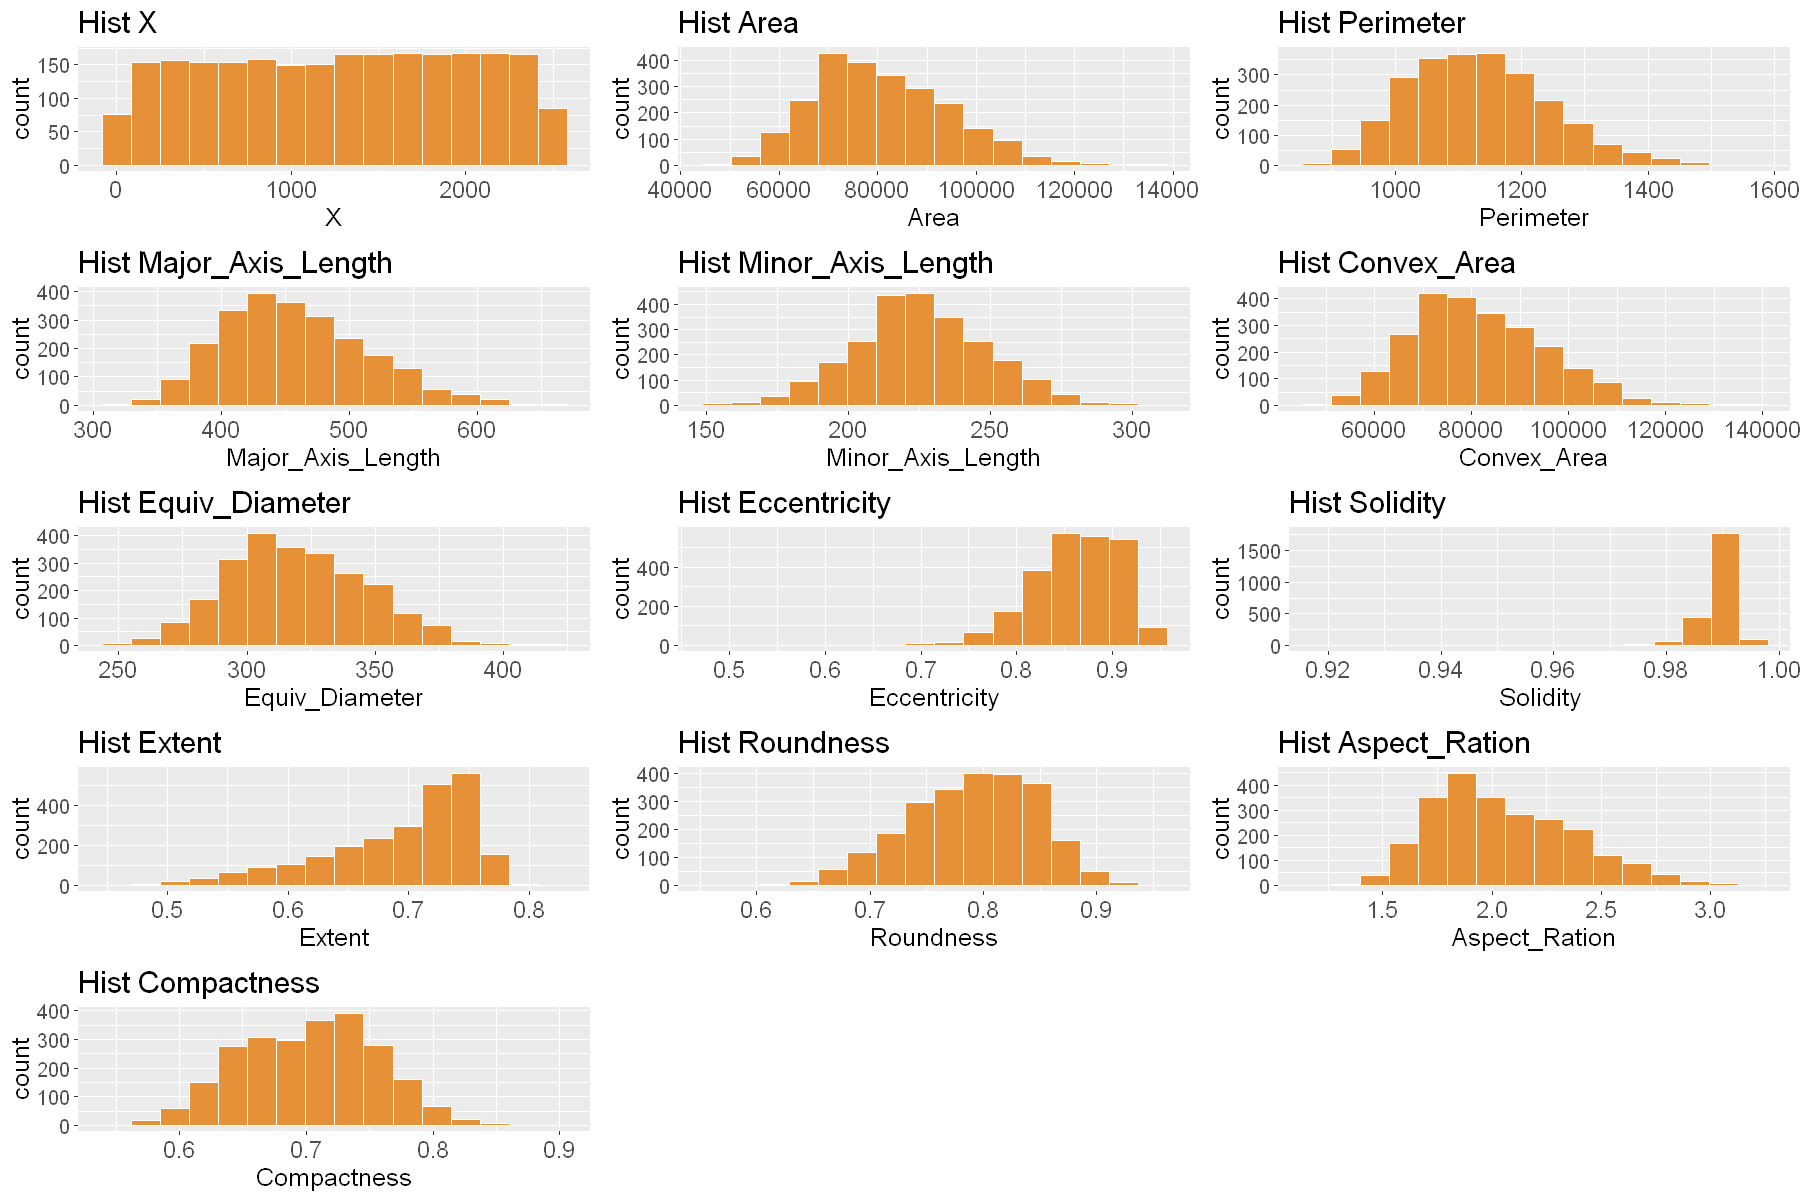

In [38]:
graficos_histograma = list()
var_data = colnames(data_b_numeric)

for (variable in var_data) {

  grafico = ggplot(data_b_numeric) +
    aes_string(x = variable) +
    geom_histogram(bins = 16, fill = '#e69138', color = 'white', na.rm = TRUE) +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) + 
    labs(title = paste('Hist', variable))
  

  graficos_histograma[[length(graficos_histograma) + 1]] = grafico
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 10  
)

# Mostrar los histogramas en un grid
do.call('grid.arrange', c(graficos_histograma, ncol = 3))

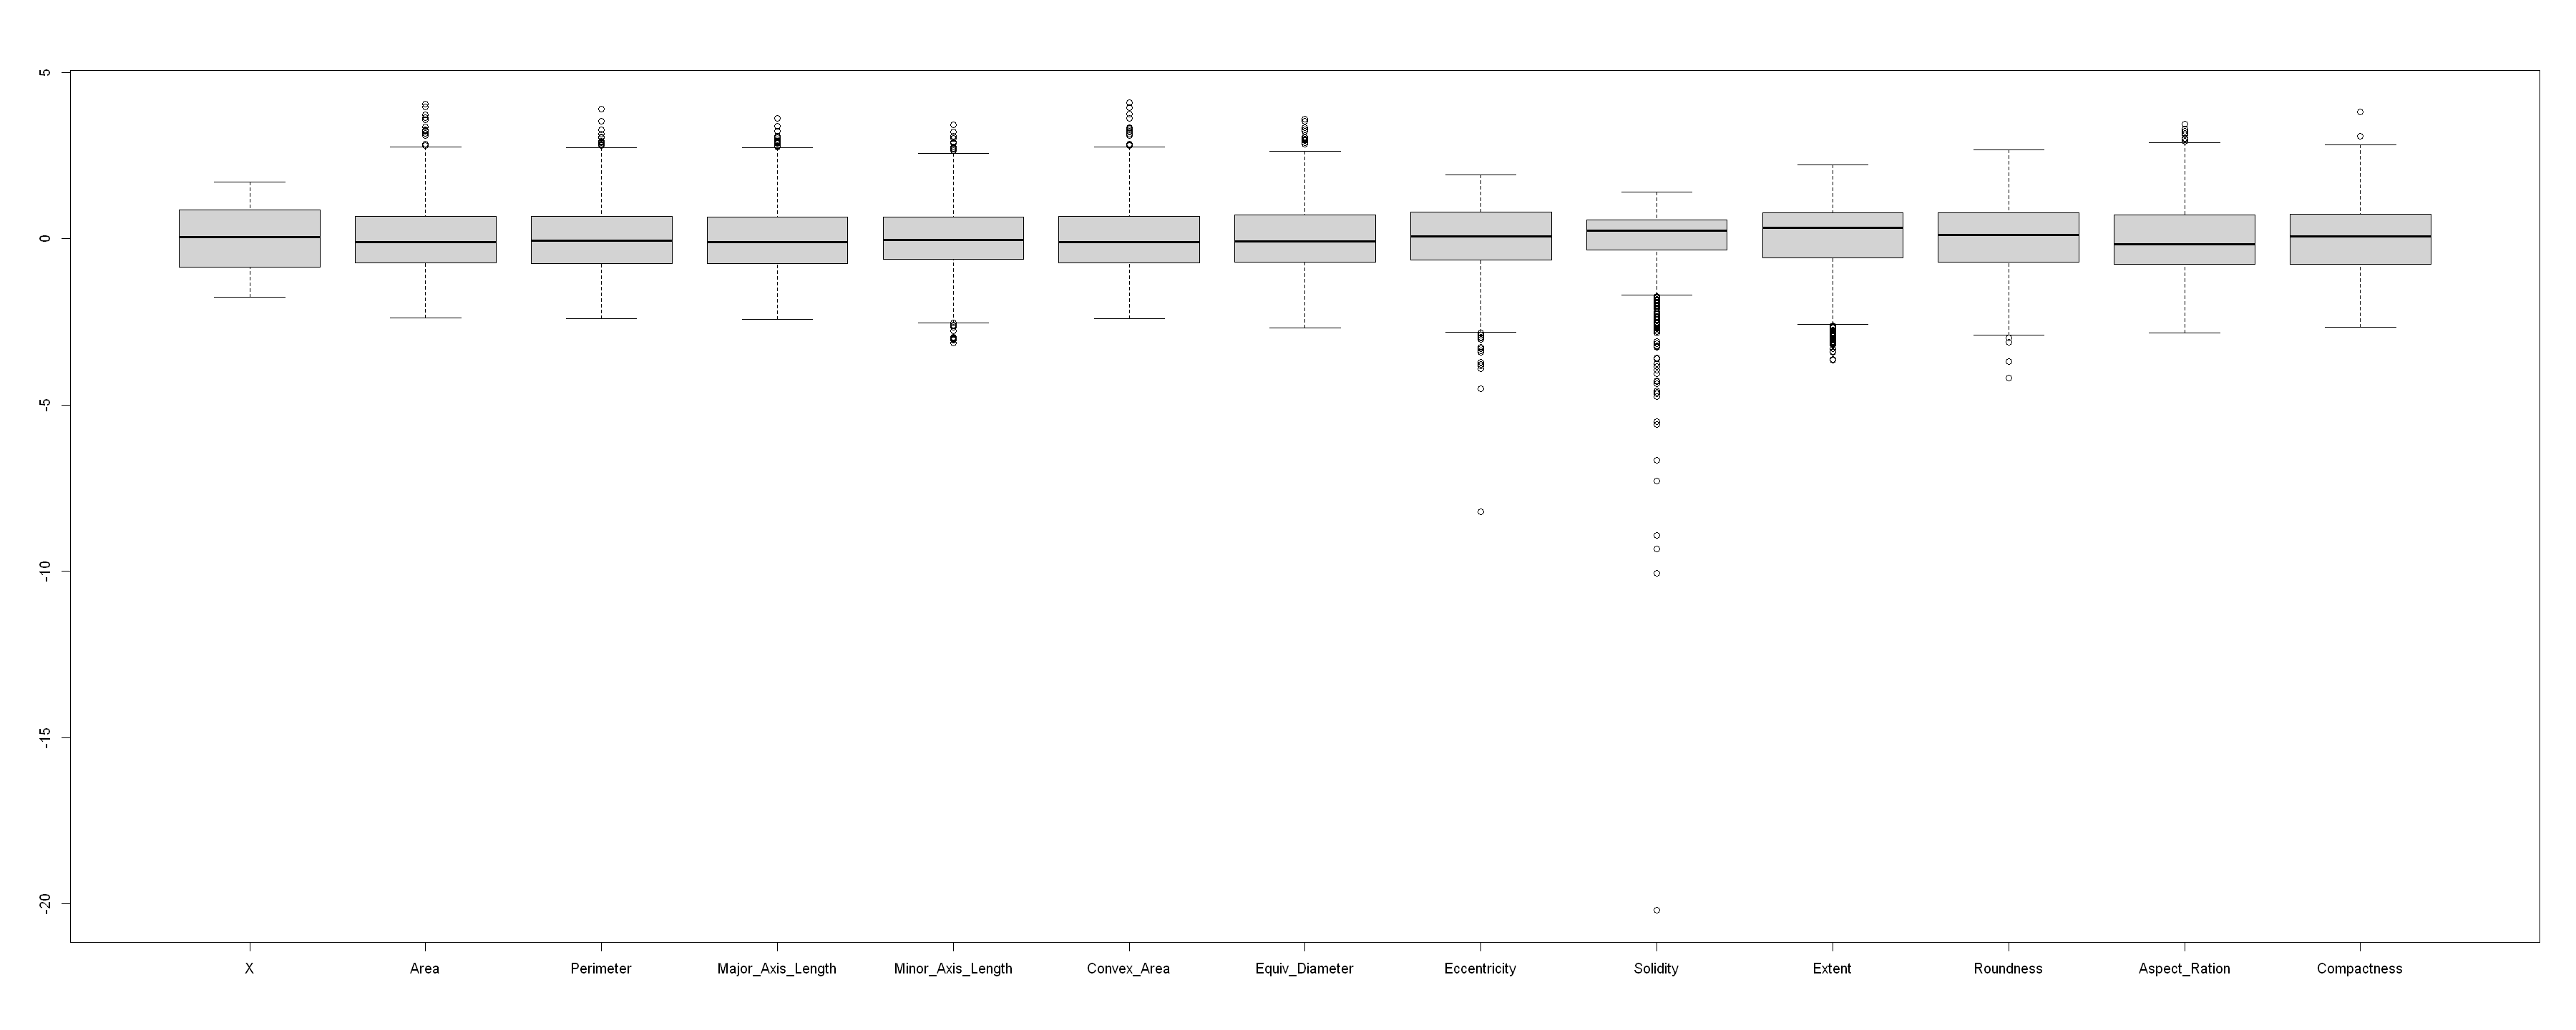

In [39]:
df_standard  <- as.data.frame(lapply(data_b_numeric, scale))
options(
  repr.plot.width = 30,  
  repr.plot.height = 12  
)
boxplot(df_standard)

Vemos como nuestra variable Solidity es la que tiene más outliers.

In [40]:
#Generamos datasets filtrando por la clase
data_b_C = data_b[data_b$Class == 'Çerçevelik',]
data_b_U = data_b[data_b$Class == 'Ürgüp Sivrisi',]

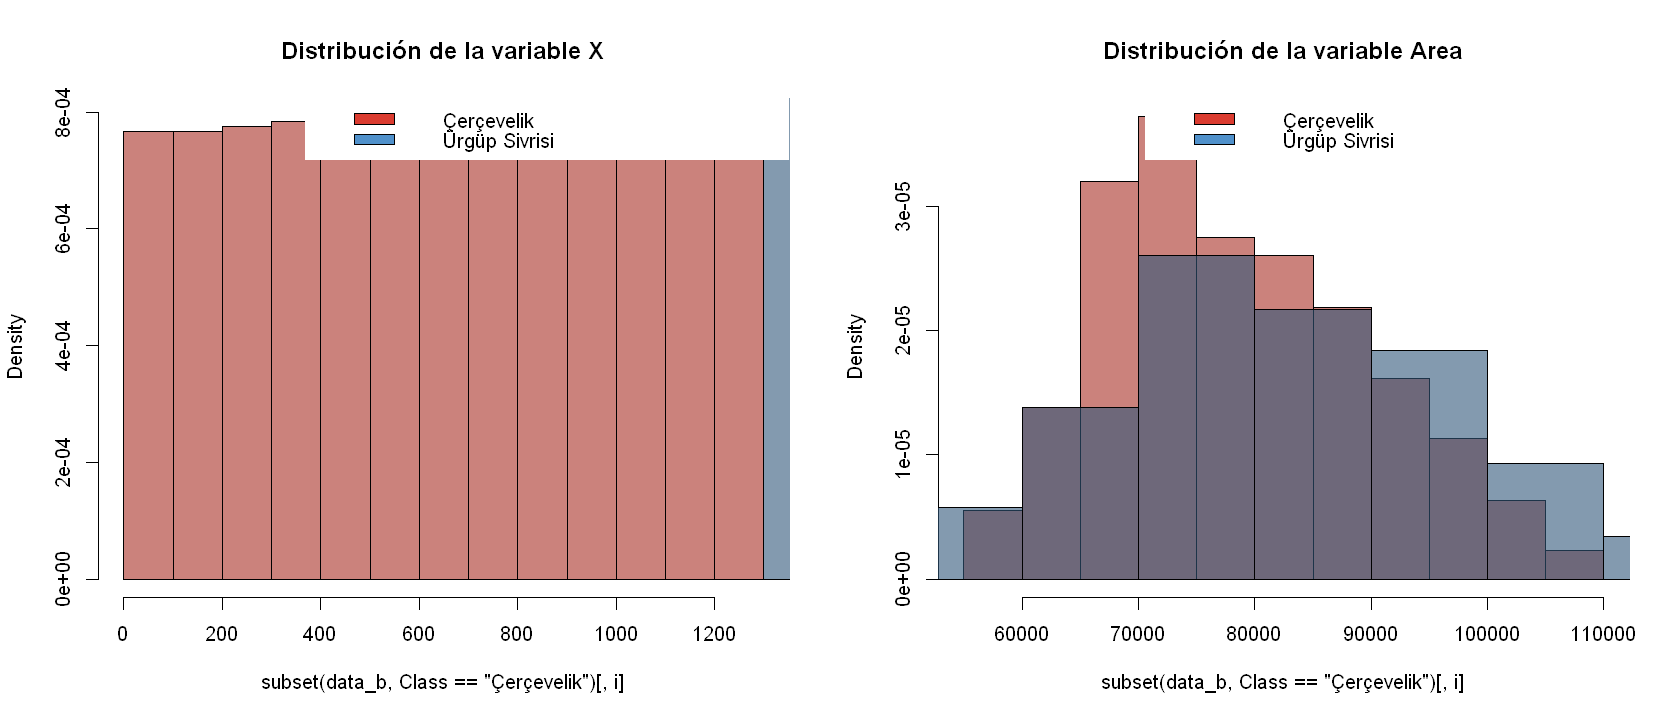

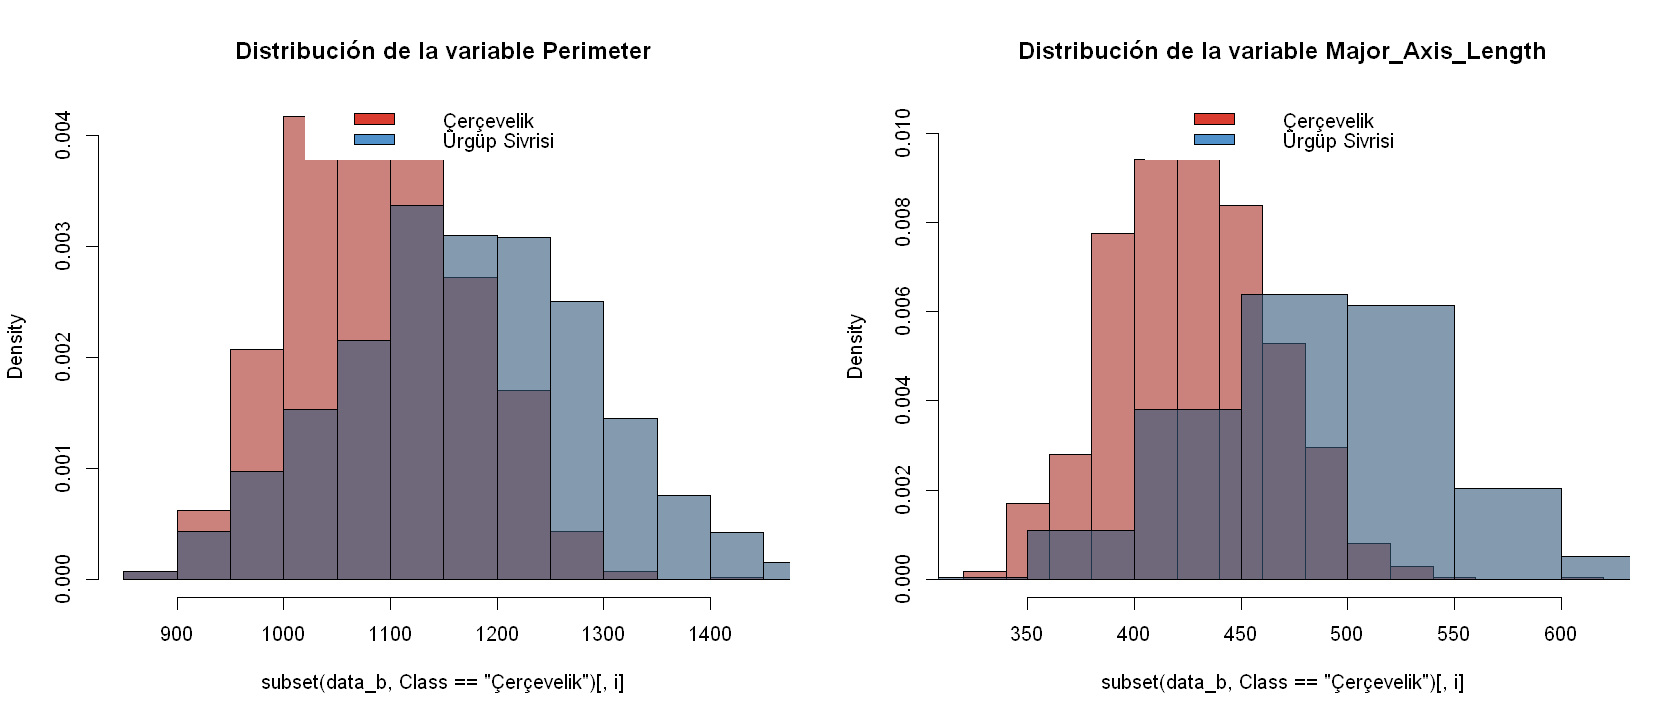

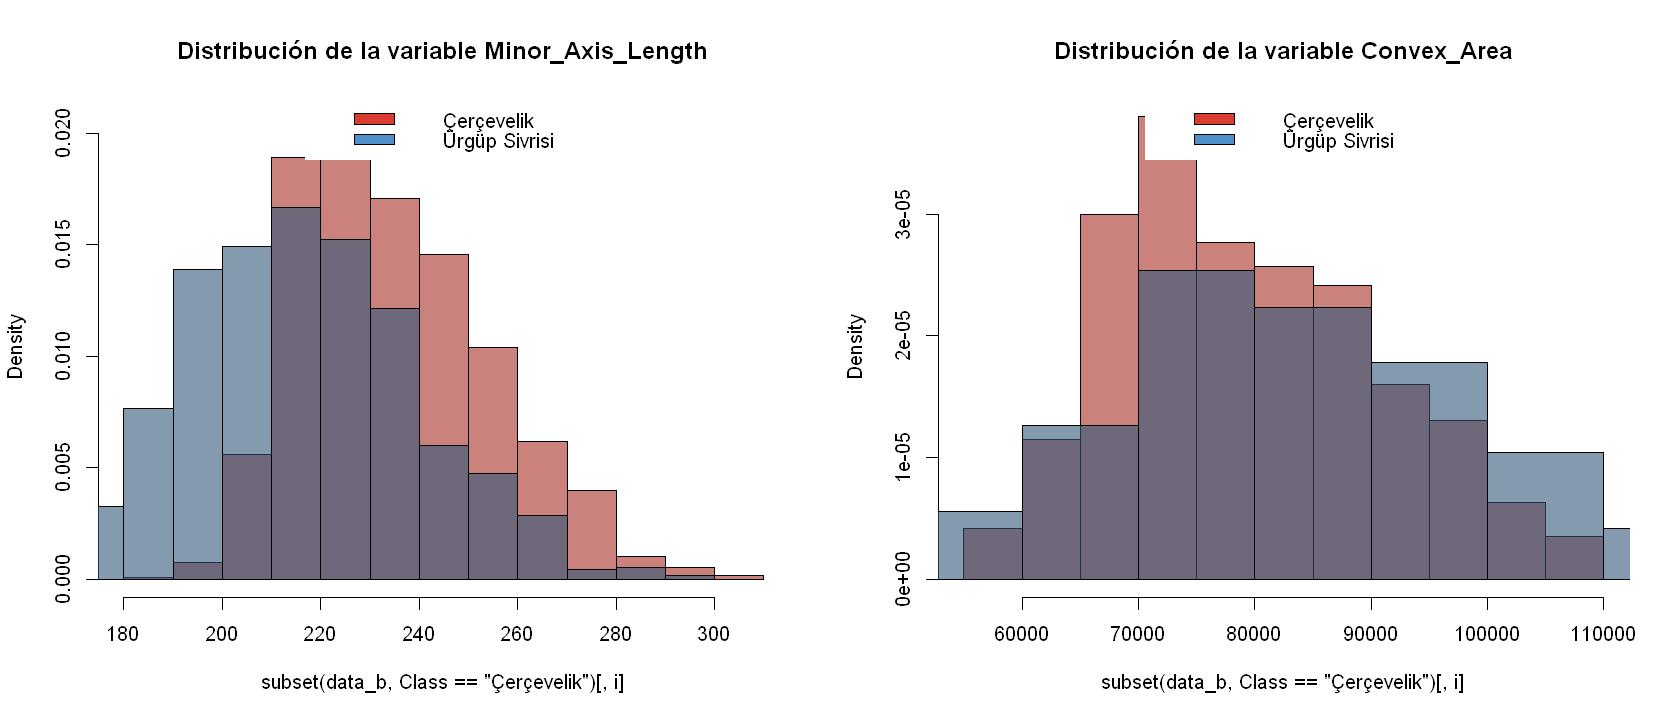

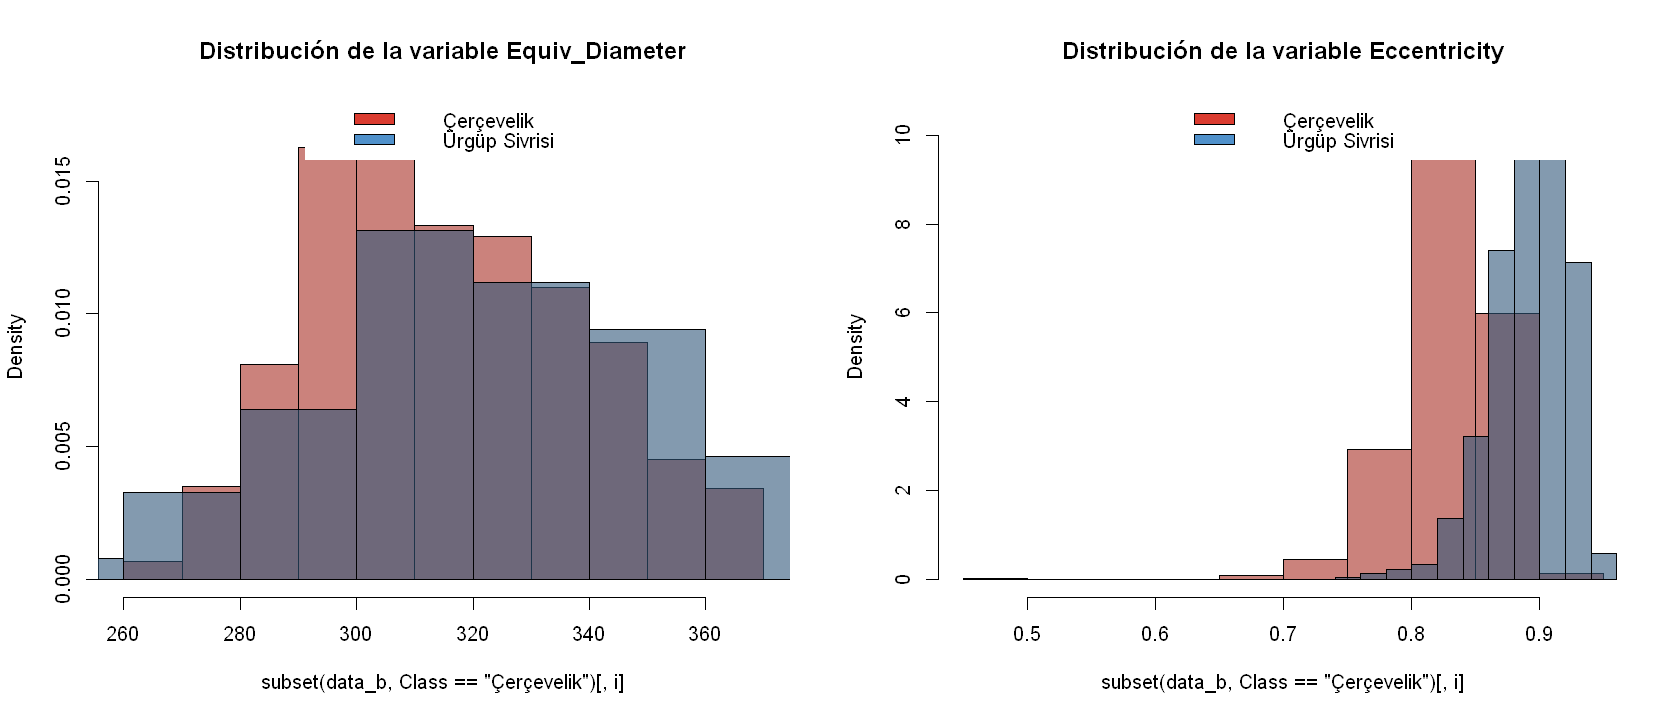

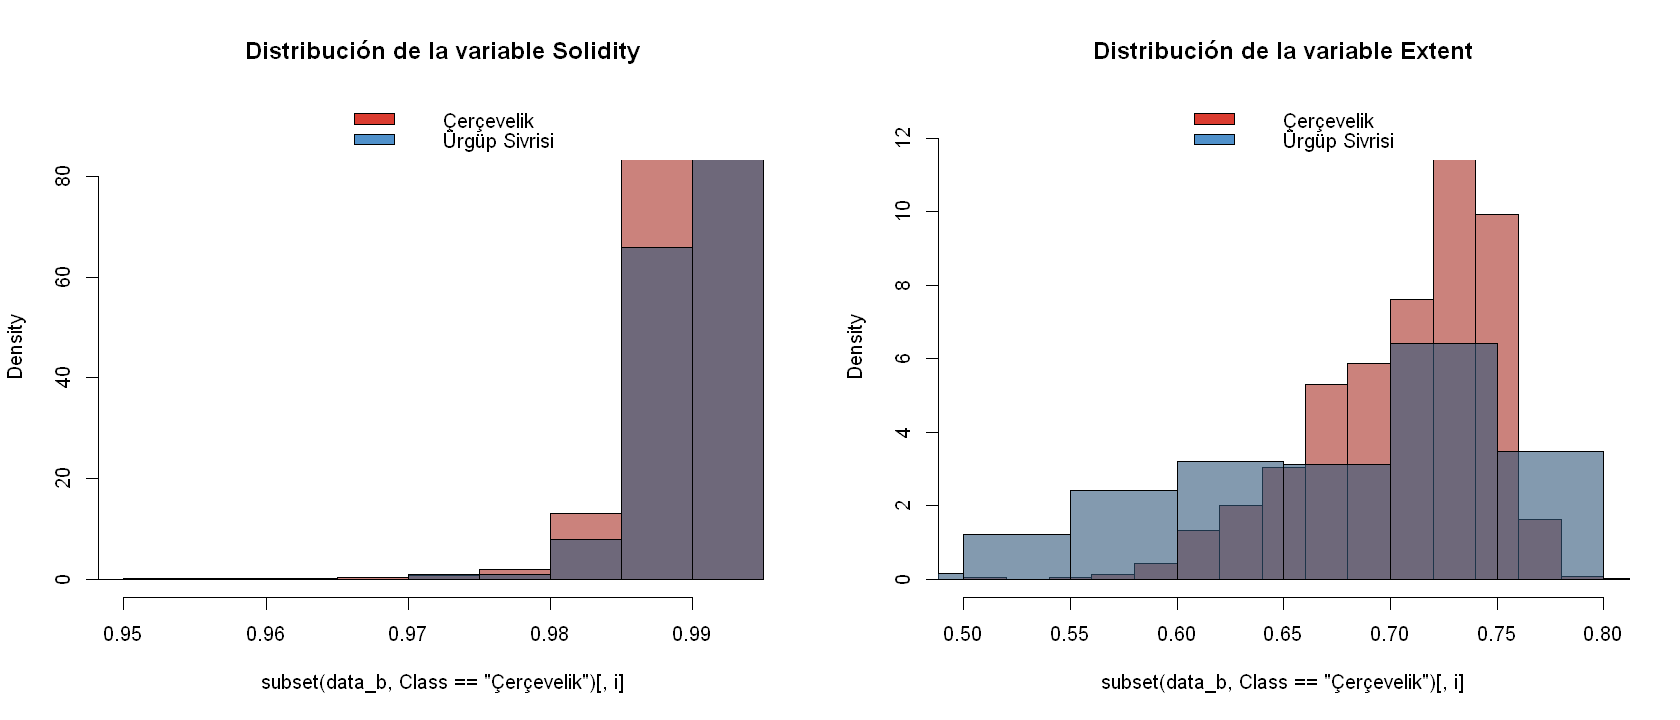

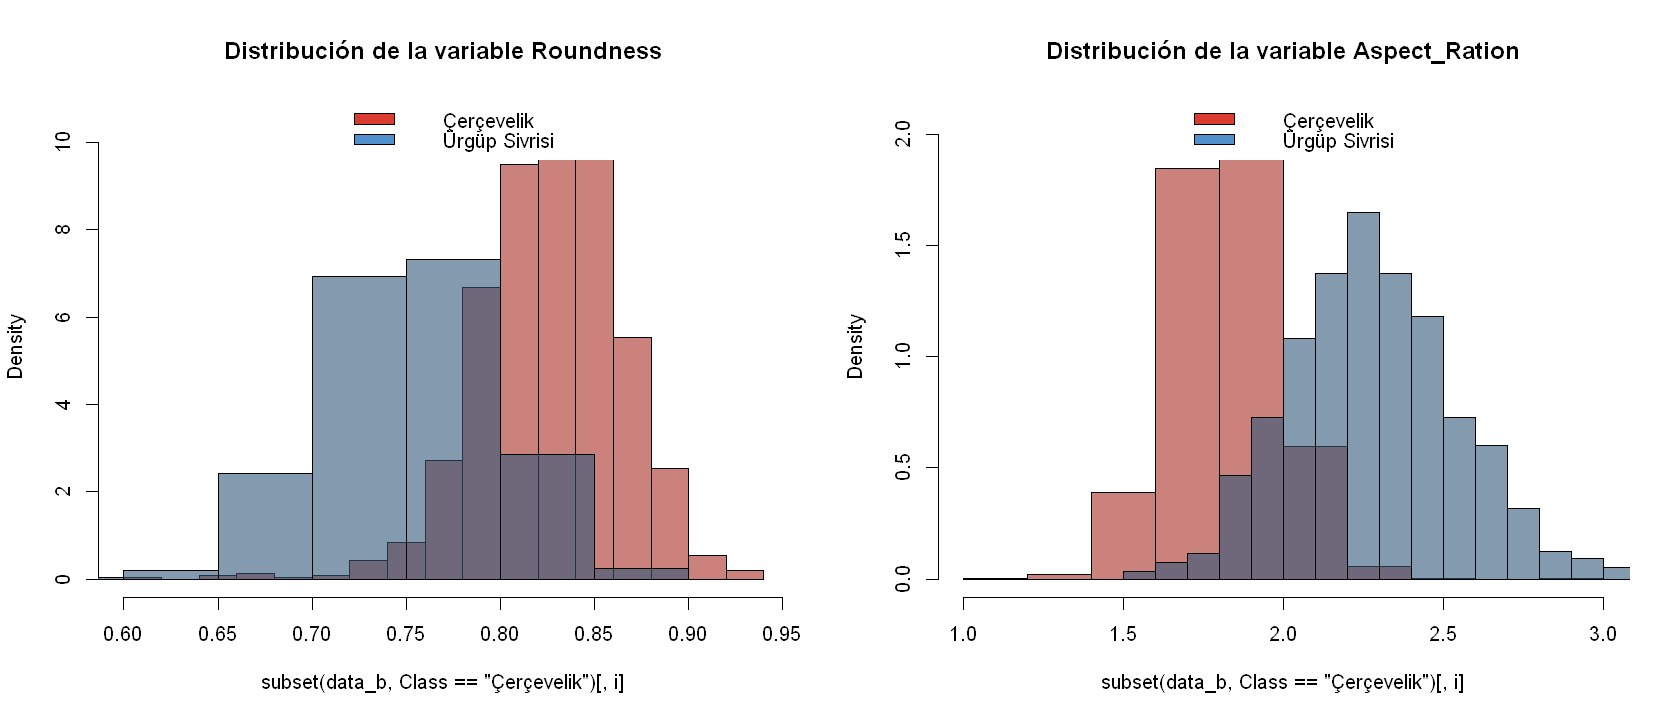

In [41]:
options(
  repr.plot.width = 14,
  repr.plot.height = 6
)

par(mfrow = c(1, 2))
for (i in 1:((length(colnames(data_b)))-2)) {

  hist(subset(data_b, Class == 'Çerçevelik')[, i],
       col = rgb(0.66,0.18,0.14,0.6),
       main = paste0("Distribución de la variable ", colnames(data_b)[i]),
       freq = FALSE)
  hist(subset(data_b, Class == 'Ürgüp Sivrisi')[, i],
     col = rgb(0.187,0.339,0.474,0.6),
       add = TRUE,
       freq = FALSE)
  #abline(v = mean(subset(data_nba_num, TARGET_5Yrs == 1)[, i]), col = '#990000', lwd = 4)
  #abline(v = mean(subset(data_nba_num, TARGET_5Yrs == 0)[, i]), col = '#0b5394', lwd = 4)
  legend(x = "topright", legend = c('Çerçevelik', 'Ürgüp Sivrisi'), fill = c('#db3c30', '#5091cb'), box.lty = "blank")
  if (i %% 2 == 0) {par(mfrow = c(1, 2))}
}

Estos gráficos nos han aportado mucha información puesto que se puede analizar tanto la distribución de las variables ordenadas por categoria y esto nos permite ver desplazamientos en las medias, y como hay variables que tienen valores más altos en función de la categoria. Dejando ver en primera instancia que aparentemente se podría relaizar un modelo de regresión logística que sea capaz de distinguir entre estas dos categorías. 

## <font color='#3d59c6'>  3. ELECCIÓN DE VARIABLES </font>